# Introducción a la Programación Dinámica

La programación dinámica es una técnica de optimización utilizada en algoritmos para resolver problemas complejos dividiéndolos en subproblemas más simples. Esta técnica es especialmente útil cuando el mismo subproblema se resuelve múltiples veces.

El ejemplo más común es el cálculo de los números de la secuencia de Fibonacci. La secuencia de Fibonacci se define como $F(n) = F(n-1) + F(n-2)$, los primeros 6 dígitos serían $[1, 1, 2, 3, 5, 8]$ . Al intentar calcular $F(n)$ de forma recursiva, se realizan muchos cálculos redundantes. La programación dinámica resuelve este problema almacenando los resultados de los subproblemas para evitar cálculos repetidos.

## Características Principales

1. El problema principal se divide en subproblemas más pequeños y manejables.
2. Los resultados de los subproblemas se almacenan para evitar cálculos redundantes.
3. Los subproblemas se resuelven de manera recursiva o iterativa.

## Ventajas

- Reduce el tiempo de ejecución al evitar cálculos repetidos.
- Facilita la resolución de problemas complejos mediante la descomposición en subproblemas.
- Puede mejorar significativamente la eficiencia de un algoritmo.

## Desventajas

- Requiere un análisis cuidadoso para identificar los subproblemas y la relación entre ellos.
- Puede ser difícil de implementar y depurar.
- No es adecuado para todos los problemas.

## Complejidad de Tiempo y Espacio

La programación dinámica puede mejorar significativamente la complejidad temporal de un algoritmo al evitar cálculos redundantes. Sin embargo, esto puede venir a costa de un mayor uso de memoria.

- Al almacenar los resultados de los subproblemas, la programación dinámica puede reducir la complejidad temporal de exponencial a polinómica en muchos casos.
- El almacenamiento de los resultados de los subproblemas puede aumentar la complejidad espacial, ya que se necesita memoria adicional para guardar estos resultados.

## Retomando el Ejemplo de Fibonacci

Evaluemos 3 enfoques para resolver el problema de Fibonacci:
1. Recursivo: Calculando $F(n)$ a partir de $F(n-1)$ y $F(n-2)$.
2. Memoization: Almacenando los resultados de los subproblemas para evitar cálculos redundantes.
3. Bottom-Up: Calculando los resultados de los subproblemas de manera iterativa.

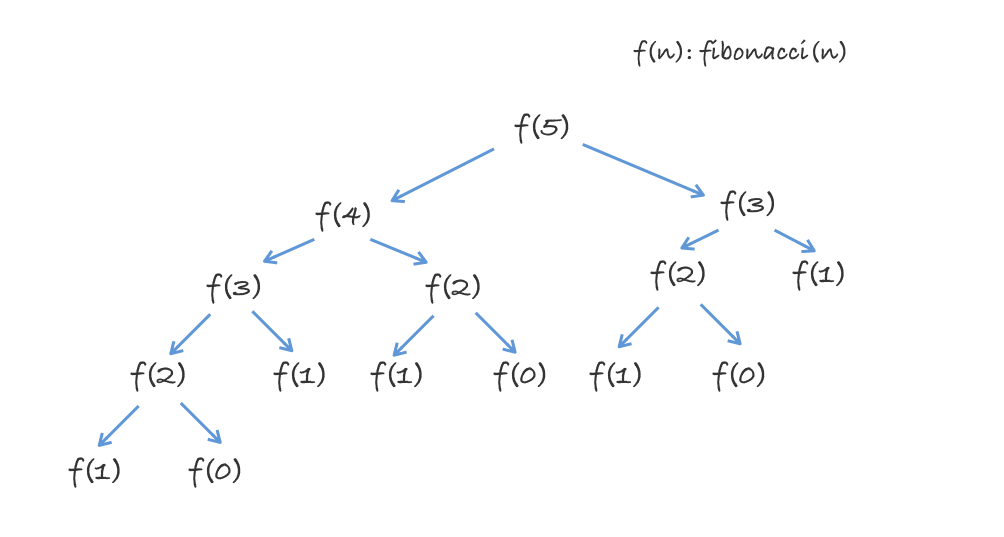

### Recursivo

In [116]:
count = 0

def fibonacci(n):
    global count
    count += 1
    
    if n <= 1:
        result = 1
    else:
        result = fibonacci(n-1) + fibonacci(n-2)
    return result

n = 5
print(f"En la posición {n} el número de fibonacci es {fibonacci(n)} después de {count} llamadas")

En la posición 5 el número de fibonacci es 8 después de 15 llamadas


Para n = 5, la secuencia de llamadas es la siguiente:

- `fibonacci(5)`
    - `fibonacci(4)`
        - `fibonacci(3)`
            - `fibonacci(2)`
                - `fibonacci(1)` (caso base = 1): resultado = 1
                - `fibonacci(0)` (caso base = 1): resultado = 2
            - `fibonacci(1)` (caso base = 1): resultado = 3
        - `fibonacci(2)`
            - `fibonacci(1)` (caso base = 1): resultado = 4
            - `fibonacci(0)` (caso base = 1): resultado = 5
    - `fibonacci(3)`
        - `fibonacci(2)`
            - `fibonacci(1)` (caso base = 1): resultado = 6
            - `fibonacci(0)` (caso base = 1): resultado = 7
        - `fibonacci(1)` (caso base = 1): resultado = 8

La complejidad temporal de este enfoque es $O(2^n)$ porque cada llamada recursiva se bifurca en dos llamadas adicionales.

### Memoization

In [44]:
count = 0
n = 5
memo = [None] * (n + 1)

def fibonacci(n, memo):
    global count
    count += 1
    
    if memo[n] is not None:
        return memo[n]
    if n <= 1:
        result = 1
    else:
        result = fibonacci(n-1, memo) + fibonacci(n-2, memo)
    memo[n] = result
    return result

print(f"En la posición {n} el número de fibonacci es {fibonacci(n, memo)} después de {count} llamadas")

En la posición 5 el número de fibonacci es 8 después de 9 llamadas


Para n = 5, la secuencia de llamadas es la siguiente:

- `fibonacci(5)`
    - `fibonacci(4)`
        - `fibonacci(3)`
            - `fibonacci(2)`
                - `fibonacci(1)` (caso base = 1)
                - `fibonacci(0)` (caso base = 1)
            - `fibonacci(1)` (memoizado)
        - `fibonacci(2)` (memoizado)
    - `fibonacci(3)` (memoizado)

La complejidad temporal de este enfoque es $O(n)$ porque cada subproblema se resuelve una vez.


### Bottom-Up

In [68]:
count = 0

def fibonacci(n):
    global count
    count += 1

    if n <= 1:
        return (1, [1])
    else:
        bottom_up = [None] * (n + 1)
        bottom_up[0] = 1
        print(f"bottom_up[0] = {bottom_up}")
        bottom_up[1] = 1
        print(f"bottom_up[1] = {bottom_up}")
        for i in range(2, n + 1):
            bottom_up[i] = bottom_up[i - 1] + bottom_up[i - 2]
            print(f"bottom_up[{i}] = {bottom_up}") 
        return (bottom_up[n], bottom_up)
    
n = 5
result, sequence = fibonacci(n)
print(f"\nEn la posición {n} el número de fibonacci es {result} después de {count} llamada\nY los números de fibonacci almacenados son {sequence}")

bottom_up[0] = [1, None, None, None, None, None]
bottom_up[1] = [1, 1, None, None, None, None]
bottom_up[2] = [1, 1, 2, None, None, None]
bottom_up[3] = [1, 1, 2, 3, None, None]
bottom_up[4] = [1, 1, 2, 3, 5, None]
bottom_up[5] = [1, 1, 2, 3, 5, 8]

En la posición 5 el número de fibonacci es 8 después de 1 llamada
Y los números de fibonacci almacenados son [1, 1, 2, 3, 5, 8]


La complejidad temporal de este enfoque es $O(n)$ porque unicamente iteramos 1 vez sobre los $n$ subproblemas.

De los 3 enfoques, el bottom-up es el más eficiente en términos de tiempo y espacio. Sin embargo, la programación dinámica no siempre es la mejor opción para resolver un problema. Es importante evaluar la complejidad temporal y espacial de cada enfoque antes de decidir cuál utilizar.

Bottom-up es un enfoque de programación dinámica, ya que se resuelven los subproblemas de manera iterativa y se almacenan los resultados para evitar cálculos redundantes.

Memoization también es un enfoque de programación dinámica, pero se resuelven los subproblemas de manera recursiva y se almacenan los resultados para evitar cálculos redundantes. 
La recursión implica un mayor uso de la pila de llamadas, lo que puede ralentizar el rendimiento, es por eso que el enfoque bottom-up es preferible en muchos casos.

Recursivo no es un enfoque de programación dinámica, ya que no se almacenan los resultados de los subproblemas.

## Ejercicio House Robber

You are a professional robber planning to rob houses along a street. Each house has a certain amount of money stashed, the only constraint stopping you from robbing each of them is that adjacent houses have security systems connected and it will automatically contact the police if two adjacent houses were broken into on the same night.

Given an integer array nums representing the amount of money of each house, return the maximum amount of money you can rob tonight without alerting the police.

**Example 1**:

Input: `nums = [1,2,3,1]`

Output: `4`

Explanation: `Rob house 1 (money = 1) and then rob house 3 (money = 3).`

`Total amount you can rob = 1 + 3 = 4.`

**Example 2**:

Input: `nums = [2,7,9,3,1]`

Output: `12`

Explanation: `Rob house 1 (money = 2), rob house 3 (money = 9) and rob house 5 (money = 1).`

`Total amount you can rob = 2 + 9 + 1 = 12.`

Constraints:

`1 <= nums.length <= 100`

`0 <= nums[i] <= 400`

### Brute Force

In [209]:
def rob(nums):
    global count
    count = 0
    n = len(nums)

    def rob_recursive(i):
        global count
        count += 1
        if i < 0:
            return 0
        return max(rob_recursive(i - 1), rob_recursive(i - 2) + nums[i])

    return rob_recursive(n - 1)

In [206]:
nums = [1,2,3,1]
print(f"Se realizaron {count} llamadas\nLa cantidad máxima de dinero que se puede robar es {rob(nums)}\ncuando los valores de las casas son {nums}\n\n")

Se realizaron 15 llamadas
La cantidad máxima de dinero que se puede robar es 4
cuando los valores de las casas son [1, 2, 3, 1]




In [210]:
nums = [2,7,9,3,1,6,8,9]
print(f"Se realizaron {count} llamadas\nLa cantidad máxima de dinero que se puede robar es {rob(nums)}\ncuando los valores de las casas son {nums}")

Se realizaron 109 llamadas
La cantidad máxima de dinero que se puede robar es 26
cuando los valores de las casas son [2, 7, 9, 3, 1, 6, 8, 9]


- La complejidad temporal de este problema es $O(2^n)$ porque se generan todas las combinaciones posibles de casas a robar.

- La complejidad espacial es $O(n)$ por la pila de llamadas de la recursión.

### Memoization

In [231]:
def rob(nums):
    global count
    n = len(nums)
    memo = {}
    count = 0

    def rob_recursive(i):
        global count
        count += 1

        if i < 0:
            return 0
        if i in memo:
            return memo[i]

        memo[i] = max(rob_recursive(i - 1), rob_recursive(i - 2) + nums[i])
        return memo[i]

    return rob_recursive(n - 1)

In [232]:
nums = [1,2,3,1]
print(f"Se realizaron {count} llamadas\nLa cantidad máxima de dinero que se puede robar es {rob(nums)}\ncuando los valores de las casas son {nums}\n\n")

Se realizaron 9 llamadas
La cantidad máxima de dinero que se puede robar es 4
cuando los valores de las casas son [1, 2, 3, 1]




- `rob_recursive(3)`
    - `rob_recursive(2)`
        - `rob_recursive(1)`
            - `rob_recursive(0)`
                - `rob_recursive(-1)`, return 0
                - `rob_recursive(-2)`, return 0
            - `rob_recursive(-1)`, return 0
        - `rob_recursive(0)` memoized
    - `rob_recursive(1)` memoized

In [226]:
nums = [2,7,9,3,1]
print(f"Se realizaron {count} llamadas\nLa cantidad máxima de dinero que se puede robar es {rob(nums)}\ncuando los valores de las casas son {nums}")

Se realizaron 11 llamadas
La cantidad máxima de dinero que se puede robar es 12
cuando los valores de las casas son [2, 7, 9, 3, 1]




- `rob_recursive(4)`
    - `rob_recursive(3)`
        - `rob_recursive(2)`
            - `rob_recursive(1)`
                - `rob_recursive(0)`
                    - `rob_recursive(-1)`, return 0
                    - `rob_recursive(-2)`, return 0
                - `rob_recursive(-1)` memoized
            - `rob_recursive(0)` memoized
        - `rob_recursive(1)` memoized
    - `rob_recursive(2)` memoized



- La complejidad temporal de este problema es $O(n)$ porque se resuelven los subproblemas de manera recursiva **una** única vez y se almacenan los resultados para evitar cálculos redundantes.

- La complejidad espacial es $O(n)$ por la pila de llamadas de la recursión y el diccionario que almacena los resultados de los subproblemas.

### Bottom Up

In [145]:
def rob(nums):
    n = len(nums)
    if n == 0:
        return 0
    if n == 1:
        return nums[0]
    
    dp = [None] * n
    dp[0] = nums[0]
    print(f"dp[0] = {dp}")
    dp[1] = max(nums[0], nums[1])
    print(f"dp[1] = {dp}")

    for i in range(2, n):
        dp[i] = max(dp[i-1], dp[i-2] + nums[i])
        print(f"dp[{i}] = {dp}")

    return dp[n-1]

In [148]:
nums = [1,2,3,1]
print(f"\nLa cantidad máxima de dinero que se puede robar es {rob(nums)}\ncuando los valores de las casas son {nums}\n\n")

dp[0] = [1, None, None, None]
dp[1] = [1, 2, None, None]
dp[2] = [1, 2, 4, None]
dp[3] = [1, 2, 4, 4]

La cantidad máxima de dinero que se puede robar es 4
cuando los valores de las casas son [1, 2, 3, 1]




In [149]:
nums = [2,7,9,3,1]
print(f"\nLa cantidad máxima de dinero que se puede robar es {rob(nums)}\ncuando los valores de las casas son {nums}")

dp[0] = [2, None, None, None, None]
dp[1] = [2, 7, None, None, None]
dp[2] = [2, 7, 11, None, None]
dp[3] = [2, 7, 11, 11, None]
dp[4] = [2, 7, 11, 11, 12]

La cantidad máxima de dinero que se puede robar es 12
cuando los valores de las casas son [2, 7, 9, 3, 1]


- La complejidad temporal de este problema es $O(n)$ porque se recorren todos los elementos del array para calcular el máximo.

- La complejidad espacial es $O(1)$ porque no se utilizan estructuras de datos adicionales, es decir, se almacena un número constante de variables.